# using old dataset - cdc 

In [18]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [19]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as sm
import itertools
import time


# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [24]:
data = pd.read_csv('desktop/finaldatall.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'desktop/finaldatall.csv'

In [21]:
data = pd.read_csv('data/merged_cleaned_processed.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'data/merged_cleaned_processed.csv'

In [22]:
missing_vals = data.isnull().sum()
missing_df = pd.DataFrame({'feature': missing_vals.index, 'num_missing': missing_vals.values})
missing_df.sort_values(by = ['num_missing'], ascending = False)

NameError: name 'data' is not defined

In [50]:
data = data.drop([ 'second_booster_50plus_vax_pct',
 'second_booster_65plus_vax_pct',
 'additional_doses_5plus_vax_pct',
 'bivalent_booster_12plus_pop_pct',
 'bivalent_booster_18plus_pop_pct',
 'bivalent_booster_5plus_pop_pct',
 'bivalent_booster_65plus_pop_pct', 'Unnamed: 0'], axis=1)

In [51]:
data['date'] = pd.DatetimeIndex(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

In [52]:
data

date location  year  mmwr_week  covid_19_deaths  distributed  \
0    2020-01-04       AL  2020          1              0.0          0.0   
1    2020-01-04       LA  2020          1              0.0          0.0   
2    2020-01-04       VA  2020          1              0.0          0.0   
3    2020-01-04       KY  2020          1              0.0          0.0   
4    2020-01-04       KS  2020          1              0.0          0.0   
...         ...      ...   ...        ...              ...          ...   
8944 2024-01-06       OH  2024          1             23.0          0.0   
8945 2024-01-06       NY  2024          1            145.0          0.0   
8946 2024-01-06       NJ  2024          1             39.0          0.0   
8947 2024-01-06       NH  2024          1             12.0          0.0   
8948 2024-01-06       NV  2024          1              0.0          0.0   

      distributed_janssen  distributed_moderna  distributed_pfizer  \
0                     0.0                  0.0                 0.0   
1                     0.0                  0.0                 0.0   
2                     0.0                  0.0                 0.0   
3                     0.0                  0.0                 0.0   
4                     0.0                  0.0                 0.0   
...                   ...                  ...                 ...   
8944                  0.0                  0.0                 0.0   
8945                  0.0                  0.0                 0.0   
8946                  0.0                  0.0                 0.0   
8947                  0.0                  0.0                 0.0   
8948                  0.0                  0.0                 0.0   

      distributed_novavax  ...  month  region_East  region_Midwest  \
0                     0.0  ...      1            0               0   
1                     0.0  ...      1            0               0   
2                     0.0  ...      1            0               0   
3                     0.0  ...      1            0               0   
4                     0.0  ...      1            0               1   
...                   ...  ...    ...          ...             ...   
8944                  0.0  ...      1            0               1   
8945                  0.0  ...      1            1               0   
8946                  0.0  ...      1            1               0   
8947                  0.0  ...      1            1               0   
8948                  0.0  ...      1            0               0   

      region_Puerto Rico  region_South  region_West  season_Fall  \
0                      0             1            0            0   
1                      0             1            0            0   
2                      0             1            0            0   
3                      0             1            0            0   
4                      0             0            0            0   
...                  ...           ...          ...          ...   
8944                   0             0            0            0   
8945                   0             0            0            0   
8946                   0             0            0            0   
8947                   0             0            0            0   
8948                   0             0            1            0   

      season_Spring  season_Summer  season_Winter  
0                 0              0              1  
1                 0              0              1  
2                 0              0              1  
3                 0              0              1  
4                 0              0              1  
...             ...            ...            ...  
8944              0              0              1  
8945              0              0              1  
8946              0              0              1  
8947              0              0              1  
8948              0              0     

# Prophet Multivariate

Importing plotly failed. Interactive plots will not work.
15:36:14 - cmdstanpy - INFO - Chain [1] start processing
15:36:14 - cmdstanpy - INFO - Chain [1] done processing


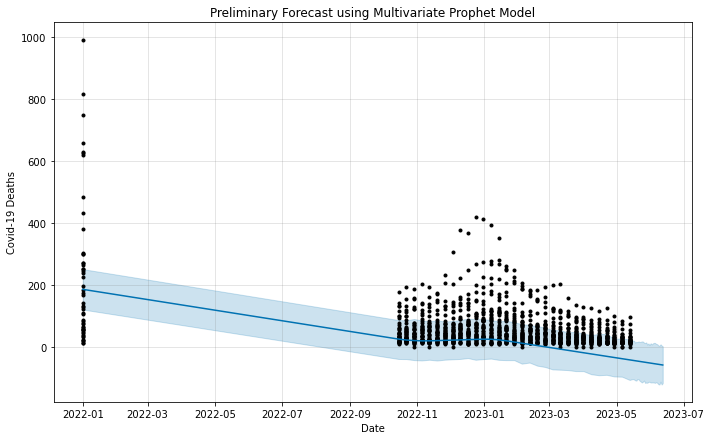

In [8]:
# 3 regressors
from prophet import Prophet

# Assuming 'data' is your DataFrame with 'date', 'covid_19_deaths', 'month', 'season_Winter', etc.
data_prophet = data.rename(columns={'date': 'ds', 'covid_19_deaths': 'y', 'second_booster_65plus': 'regressor1', 'additional_doses_5plus': 'regressor2','bivalent_booster_65plus': 'regressor3',})

data_prophet.dropna(subset=['regressor2'], inplace=True)
data_prophet.dropna(subset=['regressor3'], inplace=True) 

# Initialize Prophet model
model = Prophet()

# Add additional regressors to the model
model.add_regressor('regressor1')
model.add_regressor('regressor2')
model.add_regressor('regressor3')

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Here, you need to provide the values for the future regressors
# For demonstration purposes, I'm using a constant value
# Replace these values with your actual future regressor values
future_regressor_values_for_future_dates = 0  # Example value for regressor1
future_dates['regressor1'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor2'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor3'] = future_regressor_values_for_future_dates

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast along with the additional regressors
fig = model.plot(forecast, xlabel='Date', ylabel='Covid-19 Deaths')
plt.title('Preliminary Forecast using Multivariate Prophet Model')
plt.show()

# XGBoost Multivariate

In [24]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(data.drop(['covid_19_deaths'], axis=1))

# Split the target value and the features
y = data['covid_19_deaths']
X = X_encoded  # Use the encoded features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
xscaler_train = scaler.fit_transform(X_train)

# Only transform the test data (do not fit again)
xscaler_test = scaler.transform(X_test)

In [35]:
# Lag one week
data['deaths_half_year_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(26)

# Lag two weeks
data['deaths_1_year_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(52)

# Lag three weeks
data['deaths_1_andhalf_year_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(78)

# Lag one month
data['deaths_2_years_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(104)

# Rolling window mean
data['deaths_half_year_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


# Rolling window std dev
data['deaths_half_year_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


# Rolling window max
data['deaths_half_year_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


# Rolling window min
data['deaths_half_year_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


In [36]:
data['date']= pd.to_datetime(data['date'])

In [37]:
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime format
data['dayofweek'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear
data['dayofmonth'] = data['date'].dt.day
data['weekofyear'] = data['date'].dt.isocalendar().week.astype(np.int64)

In [38]:
features_and_target3 = data[['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'deaths_half_year_lag',
 'deaths_1_year_lag',
 'deaths_1_andhalf_year_lag',
 'deaths_2_years_lag',
 'deaths_half_year_lag_mean',
 'deaths_1_year_lag_mean',
 'deaths_1_andhalf_year_lag_mean',
 'deaths_2_years_lag_mean',
 'deaths_half_year_lag_std',
 'deaths_1_year_lag_std',
 'deaths_1_andhalf_year_lag_std',
 'deaths_2_years_lag_std',
 'deaths_half_year_lag_max',
 'deaths_1_year_lag_max',
 'deaths_1_andhalf_year_lag_max',
 'deaths_2_years_lag_max',
 'deaths_half_year_lag_min',
 'deaths_1_year_lag_min',
 'deaths_1_andhalf_year_lag_min',
 'deaths_2_years_lag_min','covid_19_deaths']]


features_and_target3    

dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear  \
0             3        1      1  1970          1           1           1   
1             3        1      1  1970          1           1           1   
2             3        1      1  1970          1           1           1   
3             3        1      1  1970          1           1           1   
4             3        1      1  1970          1           1           1   
...         ...      ...    ...   ...        ...         ...         ...   
8944          3        1      1  1970          1           1           1   
8945          3        1      1  1970          1           1           1   
8946          3        1      1  1970          1           1           1   
8947          3        1      1  1970          1           1           1   
8948          3        1      1  1970          1           1           1   

      deaths_half_year_lag  deaths_1_year_lag  deaths_1_andhalf_year_lag  ...  \
0                      NaN                NaN                        NaN  ...   
1                      NaN                NaN                        NaN  ...   
2                      NaN                NaN                        NaN  ...   
3                      NaN                NaN                        NaN  ...   
4                      NaN                NaN                        NaN  ...   
...                    ...                ...                        ...  ...   
8944                  14.0              171.0                       74.0  ...   
8945                  60.0              194.0                      113.0  ...   
8946                  21.0               89.0                       66.0  ...   
8947                  10.0               29.0                       52.0  ...   
8948                  13.0               38.0                      251.0  ...   

      deaths_2_years_lag_std  deaths_half_year_lag_max  deaths_1_year_lag_max  \
0                        NaN                       NaN                    NaN   
1                        NaN                       NaN                    NaN   
2                        NaN                       NaN                    NaN   
3                        NaN                       NaN                    NaN   
4                        NaN                       NaN                    NaN   
...                      ...                       ...                    ...   
8944                     NaN                 21.730769              25.288462   
8945                     NaN                 20.230769              24.596154   
8946                     NaN                 18.576923              23.846154   
8947                     NaN                 16.576923              22.961538   
8948                     NaN                 14.730769              22.115385   

      deaths_1_andhalf_year_lag_max  deaths_2_years_lag_max  \
0                               NaN                     NaN   
1                               NaN                     NaN   
2                               NaN                     NaN   
3                               NaN                     NaN   
4                               NaN                     NaN   
...                             ...                     ...   
8944                            NaN                     NaN   
8945                            NaN                     NaN   
8946                      18.641026                     NaN   
8947                      18.641026                     NaN   
8948                      18.641026                     NaN   

      deaths_half_year_lag_min  deaths_1_year_lag_min  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   
...                        ...                  

Processed  27 models on 26 predictors in 1.5606038570404053 seconds.
Processed  26 models on 25 predictors in 1.4019758701324463 seconds.
Processed  25 models on 24 predictors in 1.215904951095581 seconds.
Processed  24 models on 23 predictors in 1.1276609897613525 seconds.
Processed  23 models on 22 predictors in 2.1012158393859863 seconds.
Processed  22 models on 21 predictors in 1.0265567302703857 seconds.
Processed  21 models on 20 predictors in 1.348628044128418 seconds.
Processed  20 models on 19 predictors in 1.06370210647583 seconds.
Processed  19 models on 18 predictors in 0.6461613178253174 seconds.
Processed  18 models on 17 predictors in 1.0016472339630127 seconds.
Processed  17 models on 16 predictors in 0.7969481945037842 seconds.
Processed  16 models on 15 predictors in 0.6500411033630371 seconds.
Processed  15 models on 14 predictors in 0.534247875213623 seconds.
Processed  14 models on 13 predictors in 0.4006037712097168 seconds.
Processed  13 models on 12 predictors i

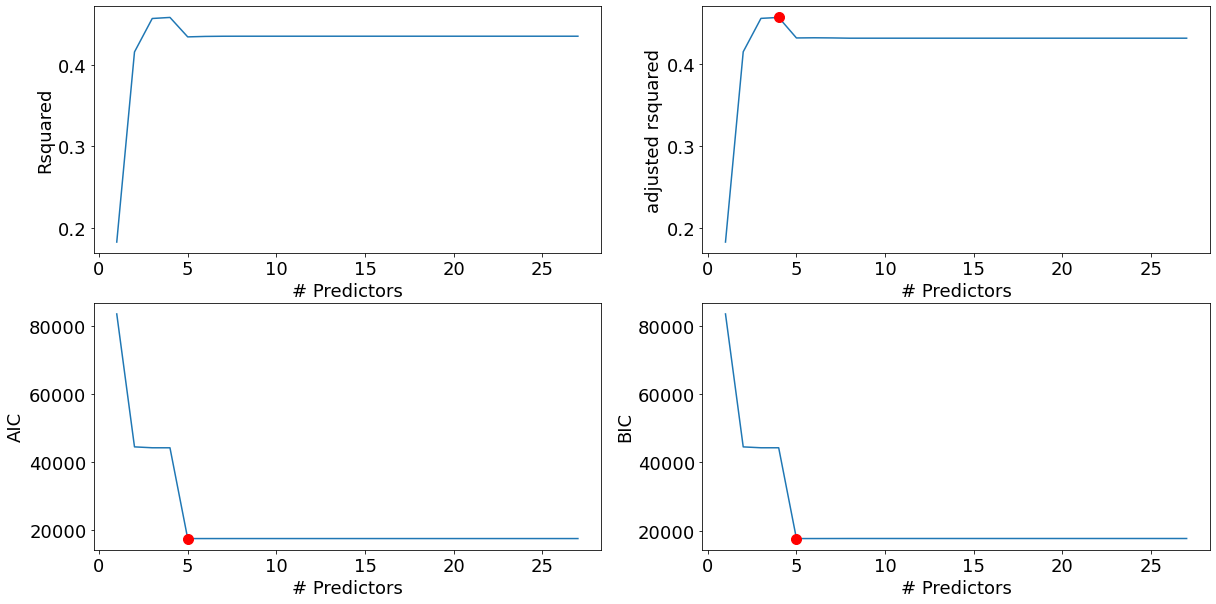

In [39]:
excluded_cols = ['covid_19_deaths']
selected_cols = [col for col in features_and_target3.columns if col not in excluded_cols]

X = features_and_target3[selected_cols]

def processSubset(predictor_subset):
    formula = 'covid_19_deaths ~ ' + ' + '.join(predictor_subset)
    model = sm.ols(formula, data=features_and_target3).fit()
    Rsquared = model.rsquared
    return {"model": model, "Rsquared": Rsquared}


def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

# Run the backward selection
models_best = backward_selection()

# Plot the results
best_sub_plots()
plt.show()

In [40]:
# Convert 'Rsquared' column to numeric
models_best['Rsquared'] = pd.to_numeric(models_best['Rsquared'])

# Get the features used in the best model
best_model_features = models_best.loc[models_best['Rsquared'].idxmax()]["model"].params.index[1:]

# Extract the corresponding column names from the original dataset
selected_features = X[best_model_features]

# Display the selected features
print("Selected Features:")
print(selected_features.columns)
print(len(selected_features.columns))

Selected Features:
Index(['deaths_half_year_lag', 'deaths_1_year_lag',
       'deaths_1_andhalf_year_lag', 'deaths_2_years_lag'],
      dtype='object')
4


In [41]:
best_bwd_reg_model = models_best['model'][22]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          3.87e-182
Time:                        16:33:10   Log-Likelihood:                -8792.5
No. Observations:                1526   AIC:                         1.760e+04
Df Residuals:                    1517   BIC:                         1.765e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       4.394e-06   8.88e-07      4.947      0.000    2.65e-06    6.14e-06
dayofweek                       1.318e-05   2.66e-06      4.947      0.000    7.95e-06    1.84e-05
quarter                         4.394e-06   8.88e-07      4.947      0.000    2.65e-06    6.14e-06
year                               0.0087      0.002      4.947      0.000       0.005       0.012
dayofyear                       4.394e-06   8.88e-07      4.947      0.000    2.65e-06    6.14e-06
dayofmonth                      4.394e-06   8.88e-07      4.947      0.000    2.65e-06    6.14e-06
weekofyear                      4.394e-06   8.88e-07      4.947      0.000    2.65e-06    6.14e-06
deaths_half_year_lag               0.0922      0.011      8.371      0.000       0.071       0.114
deaths_1_year_lag                  0.2447      0.009     26.544      0.000       0.227       0.263
deaths_1_andhalf_year_lag          0.0309      0.007      4.554      0.000       0.018       0.044
deaths_2_years_lag                -0.0488      0.007     -7.366      0.000      -0.062      -0.036
deaths_half_year_lag_mean         -0.0048      0.016     -0.299      0.765      -0.037       0.027
deaths_1_year_lag_mean             0.0098      0.012      0.804      0.422      -0.014       0.034
deaths_1_andhalf_year_lag_mean    -0.0305      0.033     -0.927      0.354      -0.095       0.034
deaths_2_years_lag_mean            0.0042      0.012      0.351      0.726      -0.019       0.027
deaths_half_year_lag_std          -0.0048      0.016     -0.299      0.765      -0.037       0.027
deaths_1_year_lag_std              0.0098      0.012      0.804      0.422      -0.014       0.034
deaths_2_years_lag_std             0.0042      0.012      0.351      0.726      -0.019       0.027
deaths_1_year_lag_max              0.0098      0.012      0.804      0.422      -0.014       0.034
deaths_2_years_lag_max             0.0042      0.012      0.351      0.726      -0.019       0.027
deaths_1_year_lag_min              0.0098      0.012      0.804      0.422      -0.014       0.034
deaths_1_andhalf_year_lag_min     -0.0305      0.033     -0.927      0.354      -0.095       0.034
deaths_2_years_lag_min             0.0042      0.012      0.351      0.726      -0.019       0.027
==============================================================================
Omnibus:                     1726.172   Durbin-Watson:                   1.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216236.304
Skew:                           5.524   Prob(JB):                         0.00
Kurtosis:                      60.261   Cond. No.                     4.75e+19
==============================================================================

Notes:
[1] Standard Errors assume 

# LSTM Multivariate